#### Interpolation using `interpolate.BarycentricInterpolator(x, y)`

* First, try with built in interpolation tools & equally spaced points

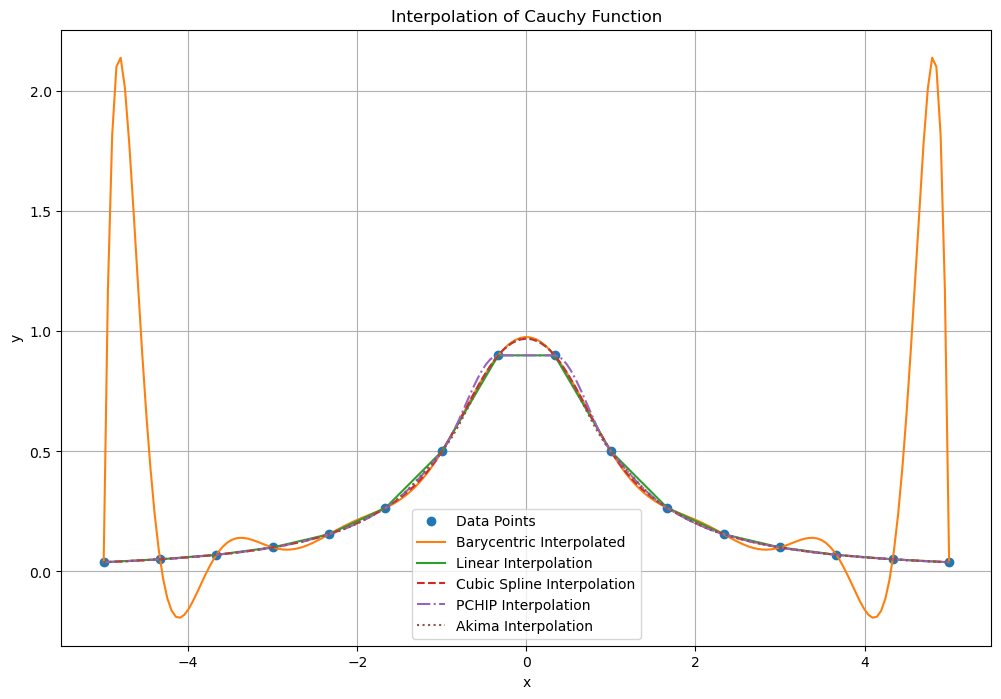

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

def cauchy(x):
    return (1 + x**2)**-1

n = 16
x = np.linspace(-5, 5, n)  # points to interpolate at
y = cauchy(x)

# Linear Interpolation
f_linear = interpolate.interp1d(x, y, kind='linear')

# this is just interpolation / 
f = interpolate.BarycentricInterpolator(x, y)

# Cubic Spline Interpolation
f_cubic = interpolate.CubicSpline(x, y)

# PCHIP Interpolation
f_pchip = interpolate.PchipInterpolator(x, y)

# Akima Interpolation
f_akima = interpolate.Akima1DInterpolator(x, y)

xnew = np.linspace(-5, 5, 200)  # points to plot at

y_bar = f(xnew)
y_linear = f_linear(xnew)
y_cubic = f_cubic(xnew)
y_pchip = f_pchip(xnew)
y_akima = f_akima(xnew)

plt.figure(figsize=(12, 8))
plt.plot(x, y, 'o', label='Data Points')
plt.plot(xnew, y_bar, '-', label='Barycentric Interpolated')
plt.plot(xnew, y_linear, '-', label='Linear Interpolation')
plt.plot(xnew, y_cubic, '--', label='Cubic Spline Interpolation')
plt.plot(xnew, y_pchip, '-.', label='PCHIP Interpolation')
plt.plot(xnew, y_akima, ':', label='Akima Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation of Cauchy Function')
plt.legend()
plt.grid(True)
plt.show()


### Runge's phenomenon:
a problem of oscillation at the edges of an interval that occurs when using polynomial interpolation with polynomials of high degree over a set of equispaced interpolation point

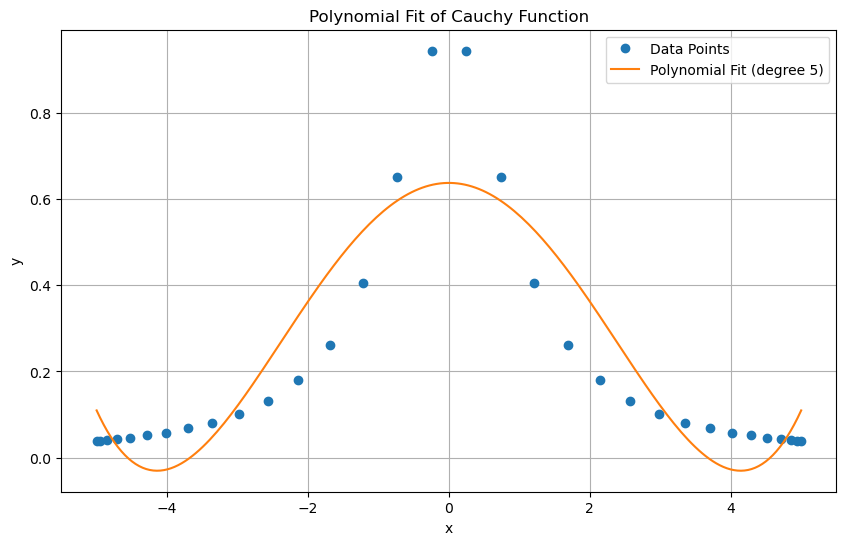

In [17]:
# Polynomial fitting (degree 5)
p_coeffs = np.polyfit(x, y, 5)
p_poly = np.poly1d(p_coeffs)

xnew = np.linspace(-5, 5, 200)
y_poly = p_poly(xnew)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data Points')
plt.plot(xnew, y_poly, '-', label='Polynomial Fit (degree 5)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fit of Cauchy Function')
plt.legend()
plt.grid(True)
plt.show()


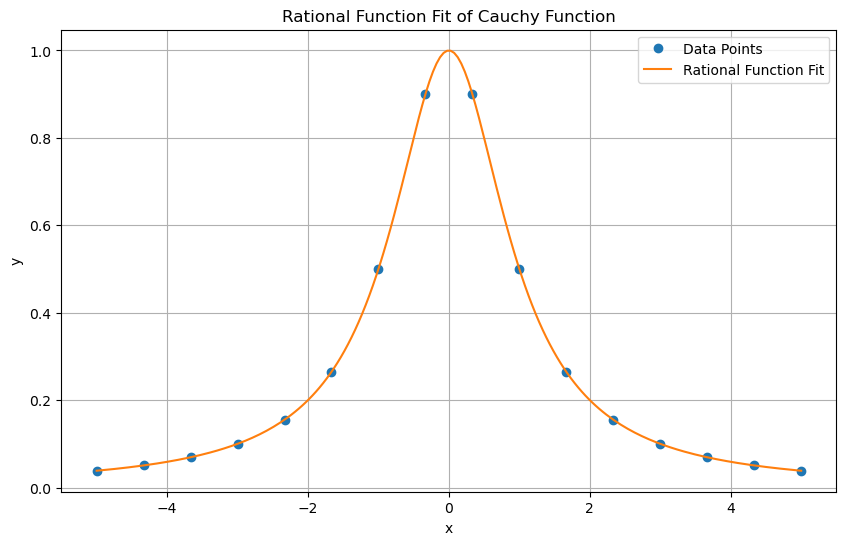

In [31]:
from scipy.optimize import curve_fit

def rational(x, p0, p1, p2, q1, q2):
    return (p0 + p1*x + p2*x**2) / (1 + q1*x + q2*x**2)

# Initial guess for the parameters
initial_guess = [1, 1, 1, 1, 1]

params, _ = curve_fit(rational, x, y, p0=initial_guess)
y_rational = rational(xnew, *params)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data Points')
plt.plot(xnew, y_rational, '-', label='Rational Function Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Rational Function Fit of Cauchy Function')
plt.legend()
plt.grid(True)
plt.show()


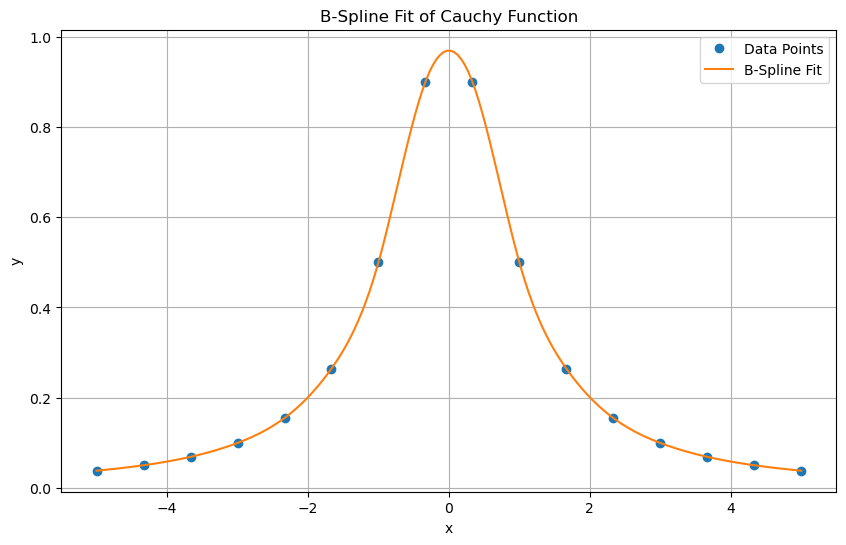

In [32]:
from scipy.interpolate import splev, splrep

# B-spline fitting
tck = splrep(x, y)
y_spline = splev(xnew, tck)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data Points')
plt.plot(xnew, y_spline, '-', label='B-Spline Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('B-Spline Fit of Cauchy Function')
plt.legend()
plt.grid(True)
plt.show()


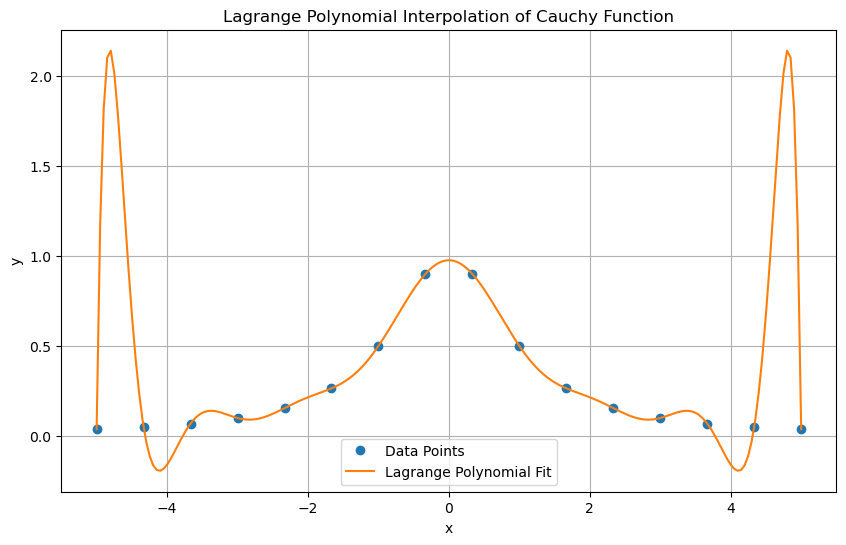

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

def cauchy(x):
    return (1 + x**2)**-1

n = 16
x = np.linspace(-5, 5, n)
y = cauchy(x)

# Lagrange polynomial interpolation
lagrange_poly = lagrange(x, y)

xnew = np.linspace(-5, 5, 200)
y_lagrange = lagrange_poly(xnew)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data Points')
plt.plot(xnew, y_lagrange, '-', label='Lagrange Polynomial Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Polynomial Interpolation of Cauchy Function')
plt.legend()
plt.grid(True)
plt.show()


## Define Lagrange interpolation from scratch

In [39]:
def lagrange_basis(x, x_i, i):
    """
    Compute the i-th Lagrange basis (l_i(x))
    """
    # for each x_i
    n = len(x_i)
    l_i = 1
    for j in range(n):
        if j != i:
            # compute the product
            l_i *= (x - x_i[j]) / (x_i[i] - x_i[j])
    return l_i

def lagrange_interpolation(x, x_i, y_i):
    """
    Compute the Lagrange interpolation polynomial at x
    
    Parameters:
    x: Point at which to evaluate the polynomial
    x_i: Array of x coordinates of the known data points
    y_i: Array of y coordinates of the known data points
    
    Returns:
    Interpolated value at x
    """
    n = len(x_i)
    p_x = 0
    for i in range(n):
        p_x += y_i[i] * lagrange_basis(x, x_i, i)
    return p_x

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

def cauchy(x):
    """Cauchy function."""
    return (1 + x**2)**-1

def chebyshev_nodes_second_kind(n, a, b):
    """Generate n Chebyshev nodes of the second kind in the interval [a, b]."""
    k = np.arange(n)
    # Nodes in [-1, 1]
    x = np.cos(k * np.pi / (n - 1))
    # Scale and shift to [a, b]
    return 0.5 * (b - a) * x + 0.5 * (b + a)

n = 12
# Generate Chebyshev nodes for interpolation
x = chebyshev_nodes_second_kind(n, 5, -5)
print(x)
y = cauchy(x)
# print(y)

[-5.         -4.79746487 -4.20626766 -3.27430367 -2.07707507 -0.71157419
  0.71157419  2.07707507  3.27430367  4.20626766  4.79746487  5.        ]


In [49]:
# Linear Interpolation
f_linear = interpolate.interp1d(x, y, kind='linear')

# Barycentric Interpolator
f = interpolate.BarycentricInterpolator(x, y)

# Cubic Spline Interpolation
f_cubic = interpolate.CubicSpline(x, y)

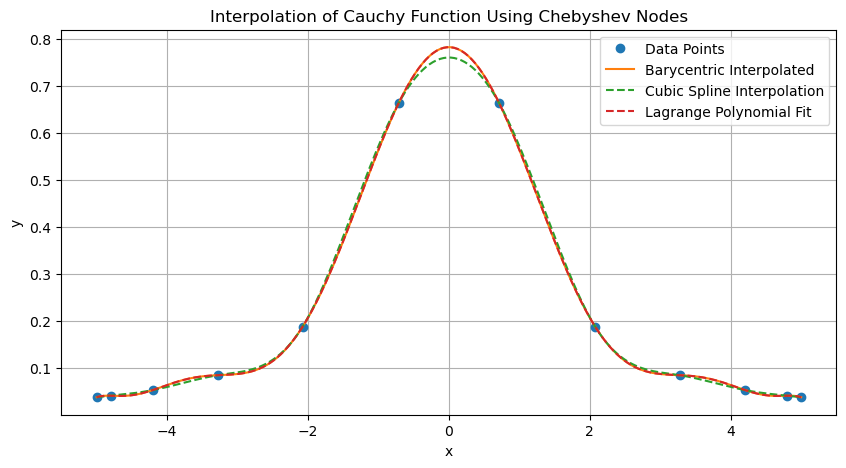

In [48]:
xnew = np.linspace(-5, 5, 200)  # points to plot at

y_bar = f(xnew)
# y_linear = f_linear(xnew)
y_cubic = f_cubic(xnew)
y_pchip = f_pchip(xnew)
y_akima = f_akima(xnew)

y_lagrange = lagrange_interpolation(xnew, x, y)

plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='Data Points')
plt.plot(xnew, y_bar, '-', label='Barycentric Interpolated')
plt.plot(xnew, y_cubic, '--', label='Cubic Spline Interpolation')
plt.plot(xnew, y_lagrange, '--', label='Lagrange Polynomial Fit')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation of Cauchy Function Using Chebyshev Nodes')
plt.legend()
plt.grid(True)
plt.show()

## Recreating Smoothed Collocation in Python based on Julia libraries
based on - https://docs.sciml.ai/DiffEqFlux/stable/examples/collocation/

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.linalg import solve, det
from numpy.linalg import norm

In [76]:
# ODE function
def true_ode_func(t, u):
    true_A = np.array([[-0.1, 2.0], [-2.0, -0.1]])
    return true_A.dot(u**3)

# Solve ODE
u0 = np.array([2.0, 0.0], dtype=np.float32)
tspan = (0.0, 1.5)
tsteps = np.linspace(*tspan, num=300)
print(tsteps.shape)

sol = solve_ivp(true_ode_func, tspan, u0, t_eval=tsteps, method='RK45')
print(sol)
true_data = sol.y

# NOISY DATA
data = sol.y + 0.1 * np.random.randn(*sol.y.shape)
print(data.shape)
print(data)

(300,)
  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.017e-03 ...  1.495e+00  1.500e+00]
        y: [[ 2.000e+00  1.996e+00 ...  1.303e+00  1.293e+00]
            [ 0.000e+00 -8.003e-02 ... -9.487e-01 -9.702e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 128
     njev: 0
      nlu: 0
(2, 300)
[[ 2.07044062  2.20983963  2.07236564  2.04606649  2.06257659  2.14343254
   1.96599173  1.84588985  1.9541479   2.0321141   2.12212914  1.85042333
   2.08147238  1.83012968  2.01798981  2.12491556  1.94084402  1.92391986
   1.88050344  1.65691728  1.81221985  1.58784816  1.62951263  1.6550808
   1.79966744  1.48130491  1.56844914  1.54152115  1.47271514  1.38706724
   1.15819679  1.23361426  1.35717232  1.24533301  1.00987034  0.98603619
   0.80109799  0.94463278  0.82373092  0.66353515  0.61585806  0.7060485
   0.46977251  0.3318084   0.44225831  0.33986133  0.2890216   0.16579305
   0.15609

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


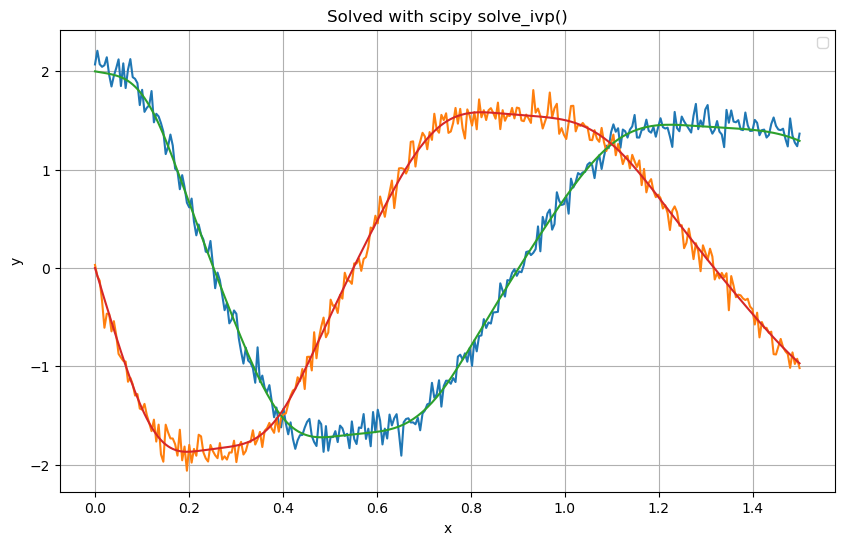

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(tsteps, data[0])
plt.plot(tsteps, data[1])
plt.plot(tsteps, true_data[0])
plt.plot(tsteps, true_data[1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solved with scipy solve_ivp()')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# define kernels
def calckernel(kernel, t):
    abst = abs(t)
    if abst > 1:
        return 0
    return kernel_dict[kernel](t, abst)

def triangular_kernel(t, abst):
    return 1 - abst

def epanechnikov_kernel(t, abst):
    return 0.75 * (1 - t**2)

kernel_dict = {
    'EpanechnikovKernel': epanechnikov_kernel,
    'TriangularKernel': triangular_kernel,
}


`documentation` reference 

In [136]:
np.ones_like([1,2,3,4,5])

array([1, 1, 1, 1, 1])

`implementation`
* fit a linear model to each variable, using weights to adjust for the importance or relevance of each data point

In [69]:
def collocate_data(data, tpoints, kernel='EpanechnikovKernel', bandwidth=None):
    n = len(tpoints)
    
    # determine bandwidth
    if bandwidth is None:
        bandwidth = n**(-1/5) * n**(-3/35) * (np.log(n))**(-1/16)

    estimated_solution = np.zeros_like(data)

    # data is flipped
    data = data.T

    for i, t in enumerate(tpoints):
        # calculate weights
        weights = np.array([calckernel(kernel, (tp - t) / bandwidth) for tp in tpoints])
        W = np.diag(weights)

        # construct a matrix for linear regression
        # second column is the differences between target points and the current point
        A = np.vstack([np.ones_like(tpoints), tpoints - t]).T
        # weighted matrix
        A_weighted = W @ A
        
        # iterate over each variable
        for var in range(data.shape[1]):
            # weighted target vector for the current variable
            b = W @ data[:, var]
            # Before solving the linear system, this check ensures that the matrix A_weighted is not singular 
            if np.linalg.matrix_rank(A_weighted) < A_weighted.shape[1]:
                continue  # skip if A_weighted is singular
            # solve the Weighted Least Squares Problem
            solution = solve(A_weighted.T @ A_weighted, A_weighted.T @ b) # (A^T * W * A)^-1 * A^T * W * b
            # stores the intercept (the constant term of the regression model) in the output matrix
            estimated_solution[var, i] = solution[0] 

    return estimated_solution  # Transpose back to match original data shape

In [70]:
print(data.shape)
data[0].shape
print(tsteps.shape)

(2, 300)
(300,)


In [71]:
# Plotting the results
estimated_solution = collocate_data(data, tsteps)

In [72]:
estimated_solution.shape

(2, 300)

In [73]:
tsteps

array([0.        , 0.00501672, 0.01003344, 0.01505017, 0.02006689,
       0.02508361, 0.03010033, 0.03511706, 0.04013378, 0.0451505 ,
       0.05016722, 0.05518395, 0.06020067, 0.06521739, 0.07023411,
       0.07525084, 0.08026756, 0.08528428, 0.090301  , 0.09531773,
       0.10033445, 0.10535117, 0.11036789, 0.11538462, 0.12040134,
       0.12541806, 0.13043478, 0.13545151, 0.14046823, 0.14548495,
       0.15050167, 0.15551839, 0.16053512, 0.16555184, 0.17056856,
       0.17558528, 0.18060201, 0.18561873, 0.19063545, 0.19565217,
       0.2006689 , 0.20568562, 0.21070234, 0.21571906, 0.22073579,
       0.22575251, 0.23076923, 0.23578595, 0.24080268, 0.2458194 ,
       0.25083612, 0.25585284, 0.26086957, 0.26588629, 0.27090301,
       0.27591973, 0.28093645, 0.28595318, 0.2909699 , 0.29598662,
       0.30100334, 0.30602007, 0.31103679, 0.31605351, 0.32107023,
       0.32608696, 0.33110368, 0.3361204 , 0.34113712, 0.34615385,
       0.35117057, 0.35618729, 0.36120401, 0.36622074, 0.37123

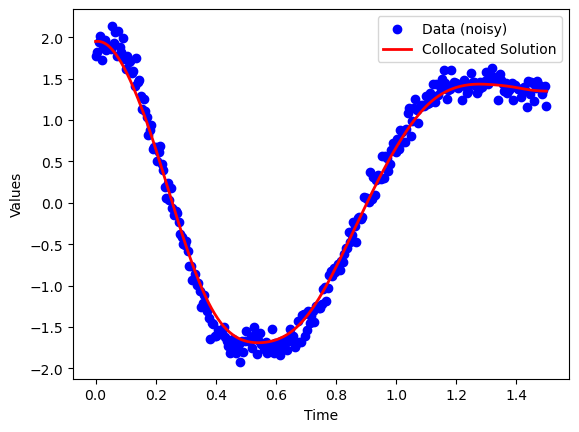

In [74]:
plt.scatter(tsteps, data[0], color='blue', label='Data (noisy)')
plt.plot(tsteps, estimated_solution[0], color='red', label='Collocated Solution', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

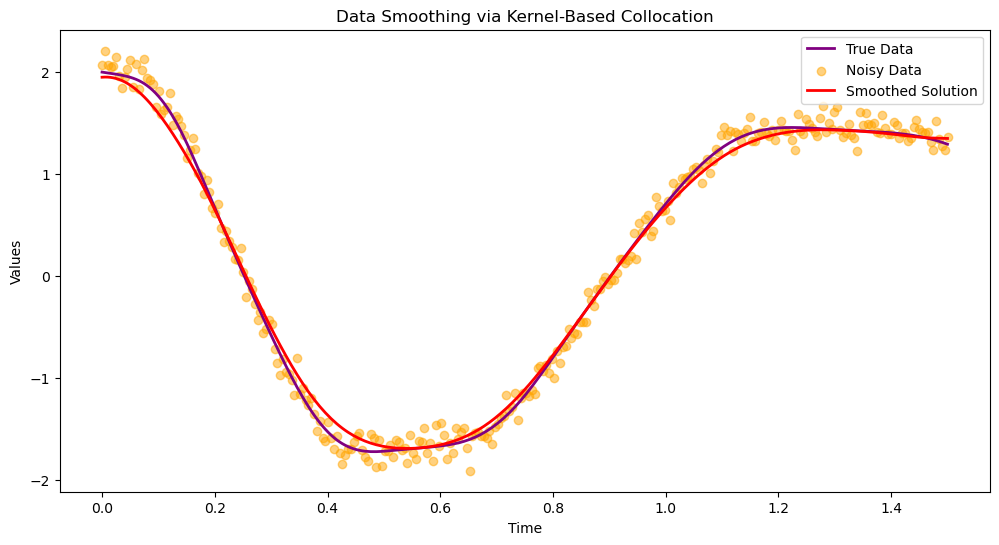

In [83]:
# Plotting the results to compare true data, noisy data, and smoothed data
plt.figure(figsize=(12, 6))
plt.plot(tsteps, true_data[0], 'purple', linewidth=2, label='True Data')
plt.scatter(tsteps, data[0], color='orange', alpha=0.5, label='Noisy Data')
plt.plot(tsteps, estimated_solution[0], 'r-', linewidth=2, label='Smoothed Solution')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Data Smoothing via Kernel-Based Collocation')
plt.legend()
plt.show()

## Damped Oscillation

In [86]:
def odes(t, y):
    X, Y = y
    dXdt = -0.1 * X**3 - 2 * Y**3
    dYdt = 2 * X**3 - 0.1 * Y**3
    return [dXdt, dYdt]

# Initial conditions and time span
u0 = [1.0, 1.0]  # Initial values for X and Y
tspan = (0, 10)  # Time range for the simulation
tsteps = np.linspace(*tspan, 500)  # Time points for solution

# Solve the ODE
sol = solve_ivp(odes, tspan, u0, t_eval=tsteps, method='RK45')
true_data = sol.y

# noisy
noisy_data = true_data + 0.1 * np.random.randn(*true_data.shape)

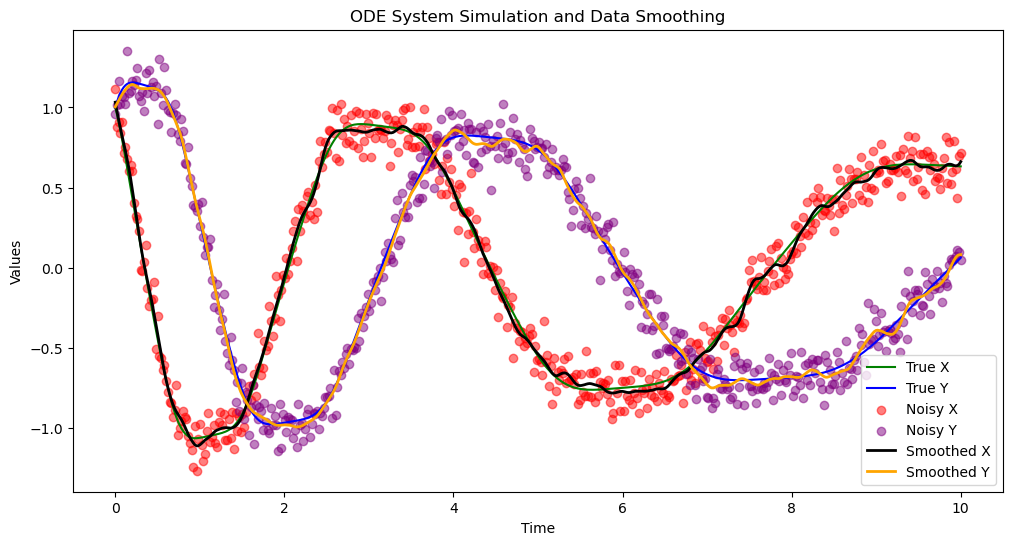

In [87]:
smoothed_data = collocate_data(noisy_data, tsteps)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(tsteps, true_data[0], 'g-', label='True X')
plt.plot(tsteps, true_data[1], 'b-', label='True Y')
plt.scatter(tsteps, noisy_data[0], color='red', alpha=0.5, label='Noisy X')
plt.scatter(tsteps, noisy_data[1], color='purple', alpha=0.5, label='Noisy Y')
plt.plot(tsteps, smoothed_data[0], 'k-', label='Smoothed X', linewidth=2)
plt.plot(tsteps, smoothed_data[1], 'orange', label='Smoothed Y', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('ODE System Simulation and Data Smoothing')
plt.legend()
plt.show()

In [76]:
def cauchy(x):
    return 1.0 / (1.0 + x**2)

def chebyshev_nodes_second_kind(n, a, b):
    k = np.arange(n)
    x = np.cos(np.pi * k / (n - 1))
    return 0.5 * (b - a) * x + 0.5 * (b + a)
n = 20  # Number of nodes
x_nodes = chebyshev_nodes_second_kind(n, 5, -5)
y_nodes = cauchy(x_nodes)
print(x_nodes)

# Random initial guess for coefficients
coefficients = np.random.randn(n)

def lagrange_polynomial(x, x_nodes, coefficients):
    n = len(x_nodes)
    polynomial = 0
    for i in range(n):
        term = coefficients[i]
        for j in range(n):
            if i != j:
                term *= (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        polynomial += term
    return polynomial

def mse_loss(x_nodes, y_nodes, coefficients):
    predictions = [lagrange_polynomial(x, x_nodes, coefficients) for x in x_nodes]
    return np.mean((np.array(predictions) - y_nodes)**2)


[-5.         -4.93180652 -4.72908621 -4.39736876 -3.94570255 -3.38640786
 -2.73474079 -2.00847712 -1.22742744 -0.41289673  0.41289673  1.22742744
  2.00847712  2.73474079  3.38640786  3.94570255  4.39736876  4.72908621
  4.93180652  5.        ]


## gradient descent using finite differences

In [77]:
learning_rate = 0.05
for iteration in range(1000):
    # init gradient to zeros
    grad = np.zeros_like(coefficients)
    for i in range(len(coefficients)):
        original = coefficients[i]
        coefficients[i] = original + 1e-5
        loss1 = mse_loss(x_nodes, y_nodes, coefficients)
        coefficients[i] = original - 1e-5
        loss2 = mse_loss(x_nodes, y_nodes, coefficients)
        # the gradient is the difference in loss divided by the step size
        grad[i] = (loss1 - loss2) / (2 * 1e-5)
        # reset the value
        coefficients[i] = original

    # update coefficients
    coefficients -= learning_rate * grad
    if iteration % 100 == 0:
        print(f"Iteration {iteration}: Loss {mse_loss(x_nodes, y_nodes, coefficients)}")

Iteration 0: Loss 0.5264048834264202
Iteration 100: Loss 0.19316838936831426
Iteration 200: Loss 0.07088465138906573
Iteration 300: Loss 0.026011677267532052
Iteration 400: Loss 0.009545188429534366
Iteration 500: Loss 0.0035026815540662943
Iteration 600: Loss 0.0012853363932806788
Iteration 700: Loss 0.00047166424306375917
Iteration 800: Loss 0.00017308088322083706
Iteration 900: Loss 6.351338388915801e-05


## 10 points

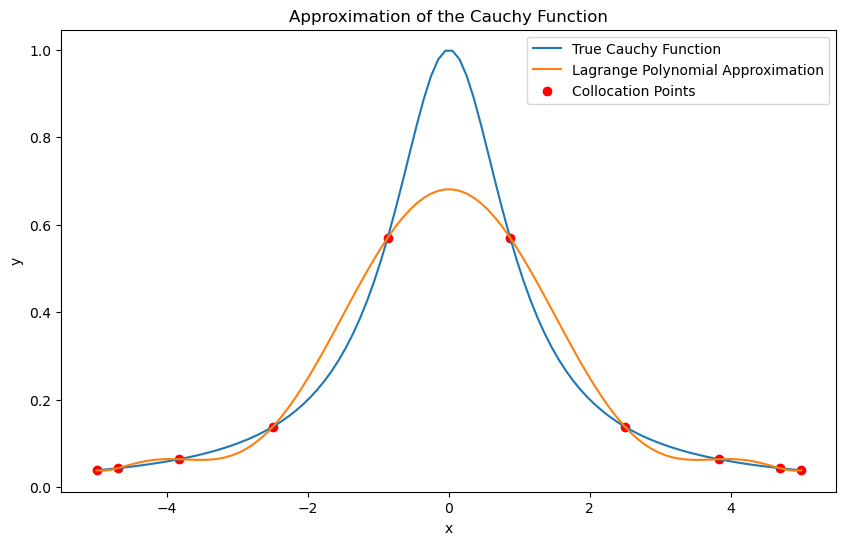

In [68]:
x_plot = np.linspace(-5, 5, 100)
y_true = cauchy(x_plot)
y_pred = [lagrange_polynomial(x, x_nodes, coefficients) for x in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_true, label='True Cauchy Function')
plt.plot(x_plot, y_pred, label='Lagrange Polynomial Approximation')
plt.scatter(x_nodes, y_nodes, color='red', label='Collocation Points')
plt.title('Approximation of the Cauchy Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## 20 points

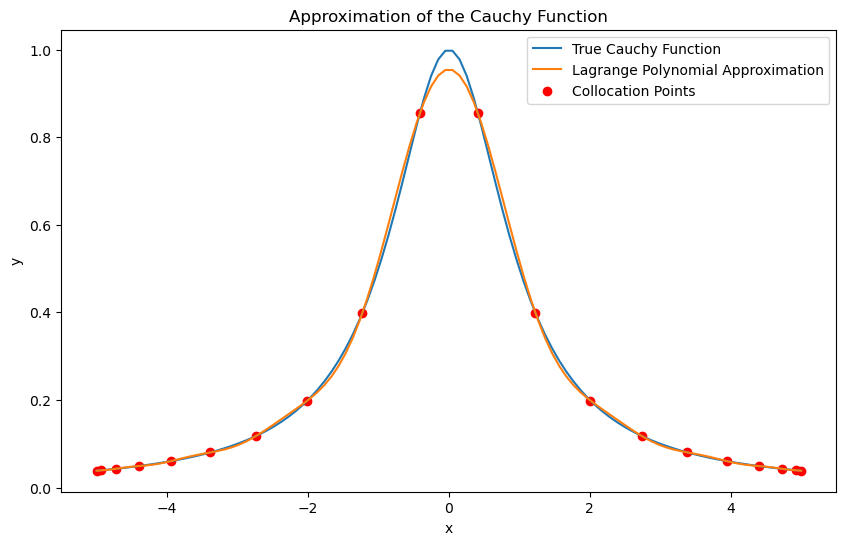

In [71]:
x_plot = np.linspace(-5, 5, 100)
y_true = cauchy(x_plot)
y_pred = [lagrange_polynomial(x, x_nodes, coefficients) for x in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_true, label='True Cauchy Function')
plt.plot(x_plot, y_pred, label='Lagrange Polynomial Approximation')
plt.scatter(x_nodes, y_nodes, color='red', label='Collocation Points')
plt.title('Approximation of the Cauchy Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [128]:
np.arange(5)

array([0, 1, 2, 3, 4])

## Barycentric Interpolation

Barycentric Interpolation:
$
p(x) = \frac{\sum_{j=0}^{n} \frac{w_j f_j}{x - x_j}}{\sum_{j=0}^{n} \frac{w_j}{x - x_j}}
$


The Barycentric weights:

$
w_j = \frac{1}{\ell'(t_j)} = \frac{1}{\prod_{\substack{k=1 \\ k \neq j}}^{n} (t_j - t_k)}, \quad j = 1, \ldots, n.
$




## Chebyshev Nodes of the Second Kind

The Chebyshev nodes of the second kind are calculated as follows:

$
x_k = \cos\left(\frac{\pi k}{n-1}\right), \quad k = 0, 1, 2, \ldots, n-1 
$

To scale and shift the nodes to the interval \([a, b]\):

$ 
\text{nodes} = 0.5 \cdot (b - a) \cdot x + 0.5 \cdot (a + b) 
$


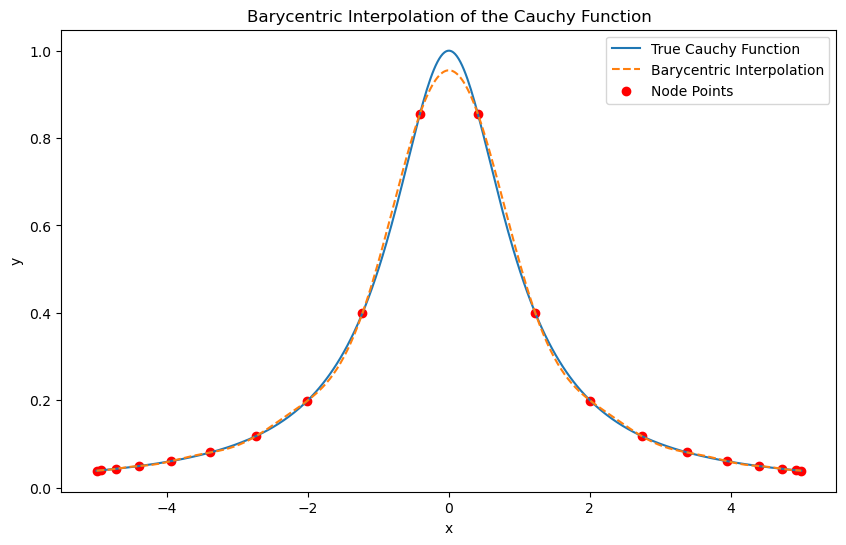

In [119]:
def cauchy(x):
    """Calculate the Cauchy function."""
    return 1.0 / (1.0 + x**2)

class BarycentricInterpolation:
    def __init__(self, n, kind='chebyshev2', start=-5, stop=5):
        self.n = n
        self.kind = kind
        self.start = start
        self.stop = stop
        self.nodes = self.chebyshev_nodes_second_kind()
        self.weights = self.compute_barycentric_weights()

    def chebyshev_nodes_second_kind(self):
        k = np.arange(self.n) # 0, 1, 2, ..., n-1
        x = np.cos(np.pi * k / (self.n - 1)) # Chebyshev nodes in [-1, 1]
        nodes = 0.5 * (self.stop - self.start) * x + 0.5 * (self.start + self.stop) # Scale and shift to [start, stop]
        return np.sort(nodes) # ensure nodes are sorted

    def compute_barycentric_weights(self):
        n = len(self.nodes)
        # for each node
        w = np.ones(n)
        for i in range(n):
            for j in range(n):
                if i != j:
                    w[i] /= (self.nodes[i] - self.nodes[j])
        return w

    def interpolate(self, y, x):
        """Interpolate function values `y` at nodes `self.nodes` to points `x`."""
        numer = 0.0
        denom = 0.0
        close_node_index = None
        close_node_diff = float('inf')
        
        # Check if x is close to any node and handle that case by direct assignment
        for j in range(self.n):
            diff = x - self.nodes[j]
            if abs(diff) < 1e-10:  # small threshold to detect closeness
                close_node_index = j
                close_node_diff = diff
                break  # break if exact node match is found to avoid divide by zero
            weights = self.weights[j] / diff
            numer += weights * y[j]
            denom += weights

        if close_node_index is not None:
            if close_node_diff == 0:
                return y[close_node_index]  # return the exact value at the node
            else:
                return numer / denom  # proceed with normal computation if not perfectly close
        return numer / denom if denom != 0 else 0.0  # prevent division by zero


n = 20
poly = BarycentricInterpolation(n=n, kind='chebyshev2', start=-5, stop=5)

# Obtain y values at the nodes
y_at_nodes = cauchy(poly.nodes)

x_plot = np.linspace(-5, 5, 400)
interpolated_y = np.array([poly.interpolate(y_at_nodes, xi) for xi in x_plot]) 
# is there a way to fix interpolation for the whole plot instead of recomputing interpolation?

plt.figure(figsize=(10, 6))
plt.plot(x_plot, cauchy(x_plot), label='True Cauchy Function')
plt.plot(x_plot, interpolated_y, '--', label='Barycentric Interpolation')
plt.scatter(poly.nodes, y_at_nodes, color='red', label='Node Points')
plt.title('Barycentric Interpolation of the Cauchy Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [120]:
interpolator.chebyshev_nodes_second_kind()

array([1.20000000e+01, 1.19969793e+01, 1.19879201e+01, 1.19728315e+01,
       1.19517289e+01, 1.19246333e+01, 1.18915722e+01, 1.18525787e+01,
       1.18076922e+01, 1.17569578e+01, 1.17004267e+01, 1.16381557e+01,
       1.15702076e+01, 1.14966507e+01, 1.14175592e+01, 1.13330127e+01,
       1.12430963e+01, 1.11479005e+01, 1.10475212e+01, 1.09420595e+01,
       1.08316215e+01, 1.07163186e+01, 1.05962667e+01, 1.04715867e+01,
       1.03424042e+01, 1.02088493e+01, 1.00710565e+01, 9.92916440e+00,
       9.78331600e+00, 9.63365812e+00, 9.48034146e+00, 9.32352038e+00,
       9.16335281e+00, 9.00000000e+00, 8.83362645e+00, 8.66439968e+00,
       8.49249008e+00, 8.31807075e+00, 8.14131733e+00, 7.96240778e+00,
       7.78152225e+00, 7.59884288e+00, 7.41455361e+00, 7.22884001e+00,
       7.04188907e+00, 6.85388903e+00, 6.66502920e+00, 6.47549974e+00,
       6.28549149e+00, 6.09519578e+00, 5.90480422e+00, 5.71450851e+00,
       5.52450026e+00, 5.33497080e+00, 5.14611097e+00, 4.95811093e+00,
      

## How do we correctly generate collocation points for periodic data?

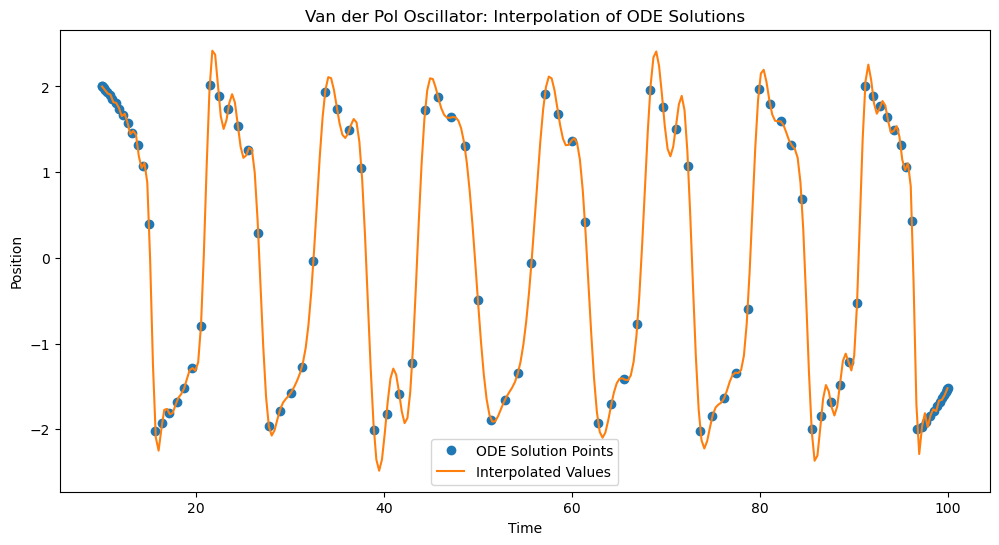

In [129]:
import numpy as np
from scipy.integrate import solve_ivp

# Define the Van der Pol equation
def van_der_pol(t, u, mu=5.0):  # Increasing mu for more nonlinearity
    y, dy = u
    return [dy, mu * (1 - y**2) * dy - y]

# Generate sample data points using solve_ivp
t_span = [10, 100]
initial_conditions = [2, 0]
n = 100

interpolator = BarycentricInterpolation(n, start=min(t_span), stop=max(t_span))

nodes = interpolator.chebyshev_nodes_second_kind()

sol = solve_ivp(van_der_pol, t_span, initial_conditions, t_eval=nodes, args=(5.0,))

y_data = sol.y[0]

# Interpolate values
t_new = np.linspace(min(t_span), max(t_span), 300)  # finer grid
y_new = [interpolator.interpolate(y_data, t) for t in t_new]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(nodes, y_data, 'o', label='ODE Solution Points')
plt.plot(t_new, y_new, '-', label='Interpolated Values')
plt.title('Van der Pol Oscillator: Interpolation of ODE Solutions')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()


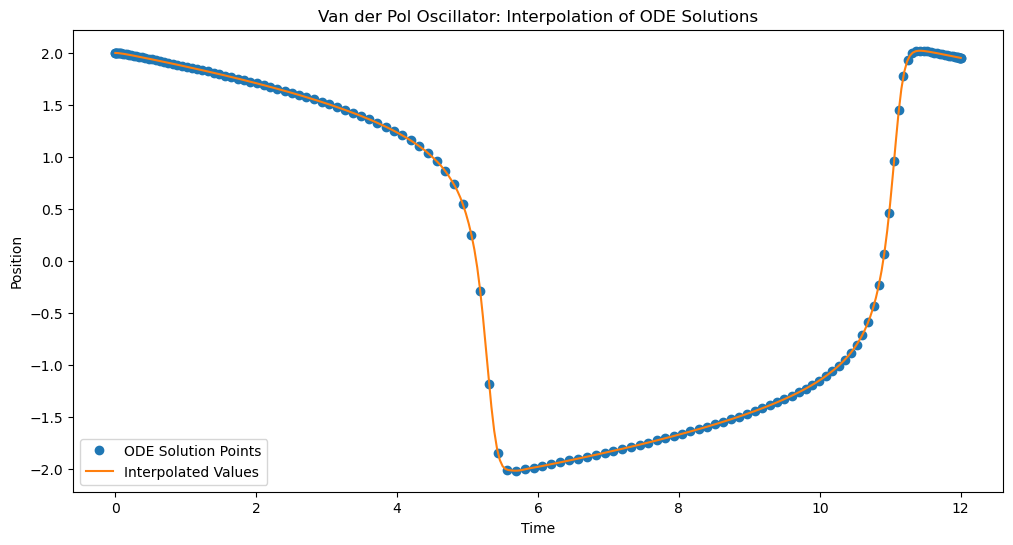

In [146]:
# Generate sample data points using solve_ivp
t_span = [0, 12]
initial_conditions = [2, 0]
n = 150

interpolator = BarycentricInterpolation(n, start=min(t_span), stop=max(t_span))

nodes = interpolator.chebyshev_nodes_second_kind()

sol = solve_ivp(van_der_pol, t_span, initial_conditions, t_eval=nodes, args=(5.0,))

y_data = sol.y[0]

# Interpolate values
t_new = np.linspace(min(t_span), max(t_span), 300)  # finer grid
y_new = [interpolator.interpolate(y_data, t) for t in t_new]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(nodes, y_data, 'o', label='ODE Solution Points')
plt.plot(t_new, y_new, '-', label='Interpolated Values')
plt.title('Van der Pol Oscillator: Interpolation of ODE Solutions')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()
